In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de Subset Sum
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **densidad-alta**: Son instancias con n = 1..200 y con densidad alta, es decir, los números de S son altos en comparación con W.
2. **densidad-baja**: Son instancias con n = 1..200 y con densidad baja, o sea, se necesitan muchos números de S para sumar W.
3. **mejor-caso-BT**: Instancias de mejor caso para el algoritmo de BT con podas.
4. **peor-caso-BT**: Instancias de peor caos para el algoritmo de BT con podas.
5. **dinamica**: Instancias con n y w variando para probar el algoritmo de PD.

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **FB**: Fuerza Bruta.
- **BT**: Backtracking con podas por optimalidad y factibilidad.
- **BT-F**: Backtracking solamente con poda por factibilidad.
- **BT-B**: Backtracking solamente con poda por optimalidad.
- **DP**: Programación dinámica.

# Experimentos
Leemos el dataframe con todos los resultados.

In [14]:
df_resultados = pd.read_csv("..\\results\\resultado.csv");
df_resultados.head()

,dataset,negocios,C,i,metodo,tiempo,nodos_promedio
0,tolerancia-alta,1,182,1,FB,0.001900,3.0
1,tolerancia-alta,1,346,2,FB,0.002661,3.0
2,tolerancia-alta,1,354,3,FB,0.001901,3.0
3,tolerancia-alta,1,288,4,FB,0.001901,3.0
4,tolerancia-alta,1,166,5,FB,0.001901,3.0


In [15]:
agg_funcs = {"C":"mean","tiempo":"mean","nodos_promedio":"mean"}
df_resultados = df_resultados.groupby(['dataset','negocios','metodo']).aggregate(agg_funcs).reset_index()
df_resultados.head()

,dataset,negocios,metodo,C,tiempo,nodos_promedio
0,BT-mejor-fact,1,BT-F,1.0,0.002281,3.0
1,BT-mejor-fact,2,BT-F,2.0,0.002281,5.0
2,BT-mejor-fact,3,BT-F,3.0,0.002281,7.0
3,BT-mejor-fact,4,BT-F,4.0,0.002281,9.0
4,BT-mejor-fact,5,BT-F,5.0,0.002281,11.0


## Experimento 1: Complejidad de Fuerza Bruta
En este experimento evaluamos el método FB con los datasets densidad-alta y densidad-baja. La hipótesis es que siempre va a tener un comportamiento exponencial porque tiene peor y mejor caso iguales.

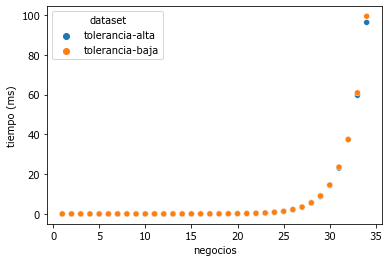

In [16]:
# Graficamos los tiempos de ejecución de cada dataset en función de n.
df_complejidad_FB = df_resultados[df_resultados["metodo"]=="FB"].copy();
fig = sns.scatterplot(data=df_complejidad_FB, x='negocios', y='tiempo', hue='dataset');
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\FB-tolerancias.svg");

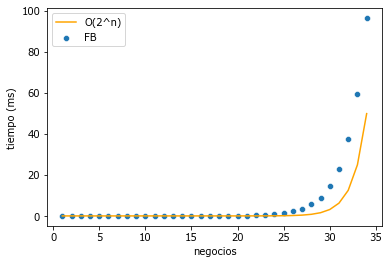

In [17]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="tolerancia-alta")].copy();
df_complejidad_FB["tiempo_esperado"] = 2.0 ** df_complejidad_FB["negocios"] * 0.0000000029; # Exponencial
fig = sns.scatterplot(data=df_complejidad_FB, x='negocios', y='tiempo');
fig = sns.lineplot(data=df_complejidad_FB, x='negocios', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\FB-complexity.svg");

Índice de correlación de Pearson: 0.9845425966880548


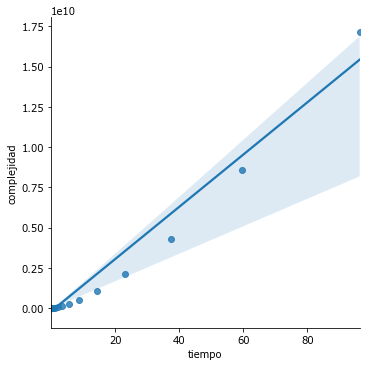

In [18]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_complejidad_FB = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="tolerancia-alta")].copy();
df_complejidad_FB["complejidad"] = 2.0 ** df_complejidad_FB["negocios"];
fig = sns.lmplot(data=df_complejidad_FB, x="tiempo", y="complejidad");
plt.savefig("..\\graphs\\FB-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_complejidad_FB, "tiempo", "complejidad"));

## Experimento 2: Complejidad de Backtracking
En este experimento evaluamos el método BT con los datasets mejor-caso-bt y peor-caso-bt. La hipótesis es que va a tener un comportamiento exponencial en el peor caso y lineal en el mejor caso.

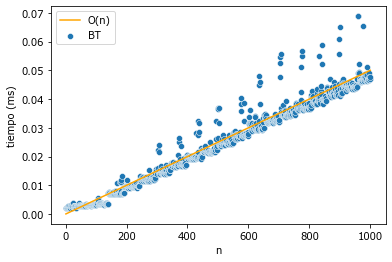

In [19]:
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT-F") & (df_resultados["dataset"] == "BT-mejor-fact")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["negocios"] * 0.00005; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='negocios', y='tiempo');
fig = sns.lineplot(data=df_BT_mejor_caso, x='negocios', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\complejidad-BT-mejor-fact.svg");

Índice de correlación de Pearson: 0.9716799793492422


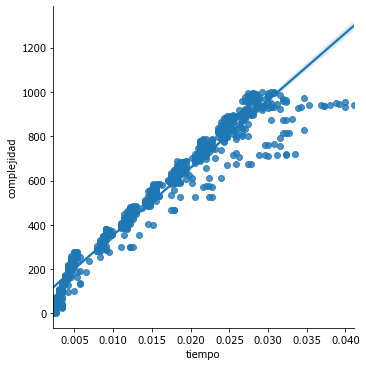

In [20]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT-O1") & (df_resultados["dataset"] == "BT-mejor-opt")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["negocios"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="tiempo", y="complejidad");
plt.savefig("..\\graphs\\correlacion-BT-mejor-fac   t.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

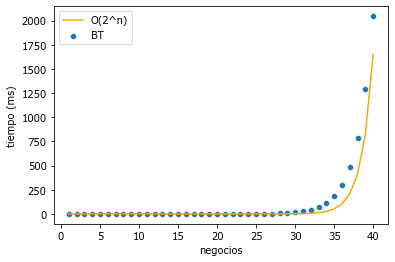

In [25]:
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT-F") & (df_resultados["dataset"] == "BT-peor-fact")].copy();
df_BT_peor_caso["tiempo_esperado"] = 2 ** df_BT_peor_caso["negocios"] * 0.0000000015; # Exponencial.
fig = sns.scatterplot(data=df_BT_peor_caso, x='negocios', y='tiempo');
fig = sns.lineplot(data=df_BT_peor_caso, x='negocios', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(2^n)','BT']);
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\correlacion-BT-peor-fact.svg");

Índice de correlación de Pearson: 0.9883698354326614


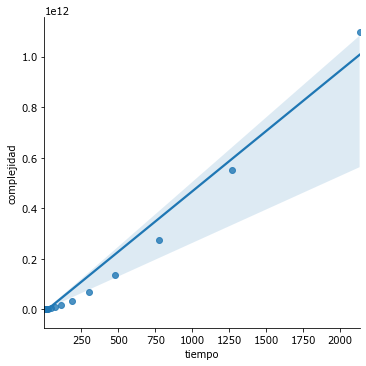

In [28]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_peor_caso = df_resultados[(df_resultados["metodo"]=="BT-O1") & (df_resultados["dataset"] == "BT-peor-opt")].copy();
df_BT_peor_caso["complejidad"] = 2.0 ** df_BT_peor_caso["negocios"];
fig = sns.lmplot(data=df_BT_peor_caso, x="tiempo", y="complejidad");
plt.savefig("..\\graphs\\correlacion-BT-peor-opt.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_peor_caso, "tiempo", "complejidad"));

## Experimento 3: Análisis de las podas
Analizar Backtracking con y sin las podas para distintas densidades.

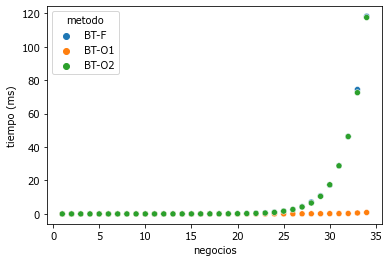

In [30]:
df_BT_tolerancia_alta = df_resultados[((df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O1") | (df_resultados["metodo"]=="BT-O2")) & (df_resultados["dataset"] == "tolerancia-alta")].copy();
df_BT_tolerancia_alta = df_BT_tolerancia_alta[df_BT_tolerancia_alta["tiempo"] < 2000]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_tolerancia_alta, x='negocios', y='tiempo', hue='metodo');
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\BT-podas.svg");

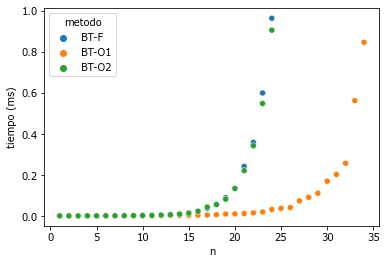

In [32]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_tolerancia_alta[df_BT_tolerancia_alta["tiempo"]<1], x='negocios', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\BT-podas-zoom.svg");

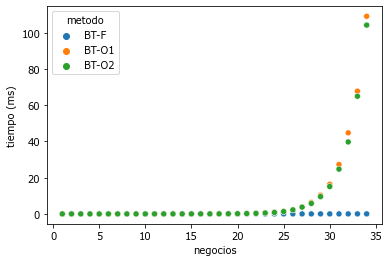

In [34]:
df_BT_tolerancia_baja = df_resultados[((df_resultados["metodo"]=="BT-F") | (df_resultados["metodo"]=="BT-O1") | (df_resultados["metodo"]=="BT-O2")) & (df_resultados["dataset"] == "tolerancia-baja")].copy();
df_BT_tolerancia_baja = df_BT_tolerancia_baja[df_BT_tolerancia_baja["tiempo"] < 2000]; # Sacamos outliers.
fig = sns.scatterplot(data=df_BT_tolerancia_baja, x='negocios', y='tiempo', hue='metodo');
fig.set(xlabel='negocios', ylabel='tiempo (ms)');
plt.savefig("..\\graphs\\BT-podas.svg");

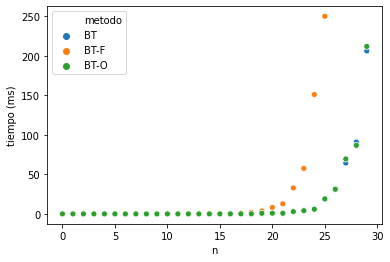

In [14]:
# Acercamos un poco la lupa para ver la diferencia entre BT y BT-O.
fig = sns.scatterplot(data=df_BT_densidad_baja[df_BT_densidad_baja["tiempo"]<400], x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-podas-baja-zoom.svg");

# Experimento 4: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

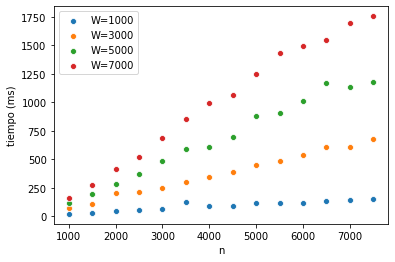

In [21]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["W"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["W"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["W"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["W"]==7000], x='n', y='tiempo');
fig.legend(labels=['W=1000','W=3000','W=5000','W=7000']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-n.svg");

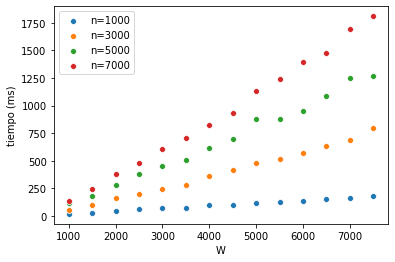

In [22]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='W', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==3000], x='W', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==5000], x='W', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==7000], x='W', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
fig.set(xlabel='W', ylabel='tiempo (ms)');
plt.savefig("graficos/dp-W.svg");

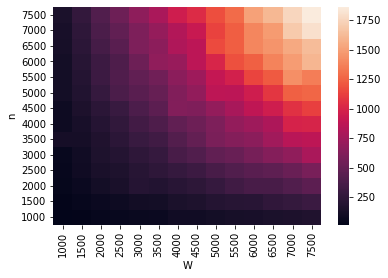

In [23]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='W', values='tiempo', aggfunc=np.mean);
fig = sns.heatmap(df_heatmap);
fig.invert_yaxis();
plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.996037630053994


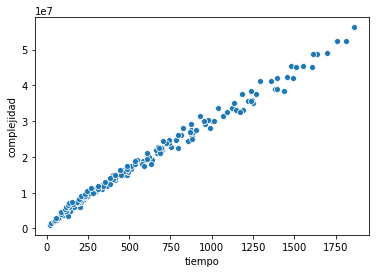

In [24]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="DP") & (df_resultados["dataset"]=="dinamica")].copy();
df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["W"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

## Experimento 5: Comparación Backtacking y Programación Dinámica
En este experimento se trata de buscar para qué casos funciona mejor cada técnica. Por ejemplo, vamos a ejecutar BT y Dinámica sobre los datasets densidad-alta y densidad-baja.

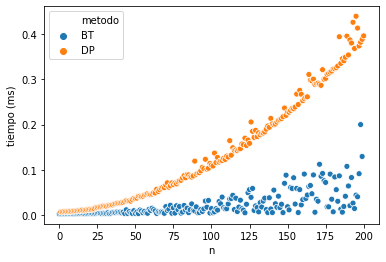

In [31]:
df_densidad_alta = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "densidad-alta")].copy();
fig = sns.scatterplot(data=df_densidad_alta, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-alta.svg");

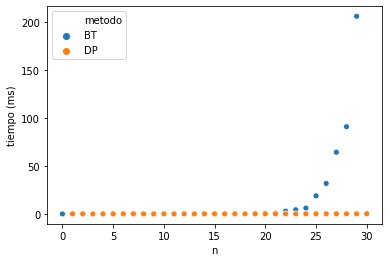

In [30]:
df_densidad_baja = df_resultados[((df_resultados["metodo"]=="BT") | (df_resultados["metodo"]=="DP")) & (df_resultados["dataset"] == "densidad-baja")].copy();
df_densidad_baja = df_densidad_baja[df_densidad_baja["n"]<=30];
fig = sns.scatterplot(data=df_densidad_baja, x='n', y='tiempo', hue='metodo');
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/comparacion-bt-dp-baja.svg");